In [31]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
from scipy import stats
from scipy.stats import norm, skew #for some statistics

housing = fetch_california_housing()

x = housing.data
y = housing.target
data = pd.DataFrame(x, columns=housing.feature_names)
data['SalePrice'] = y
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  SalePrice  
0    -122.23      4.526  
1    -122.22      3.585  
2    -122.24      3.521  
3    -122.25      3.413  
4    -122.25      3.422  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


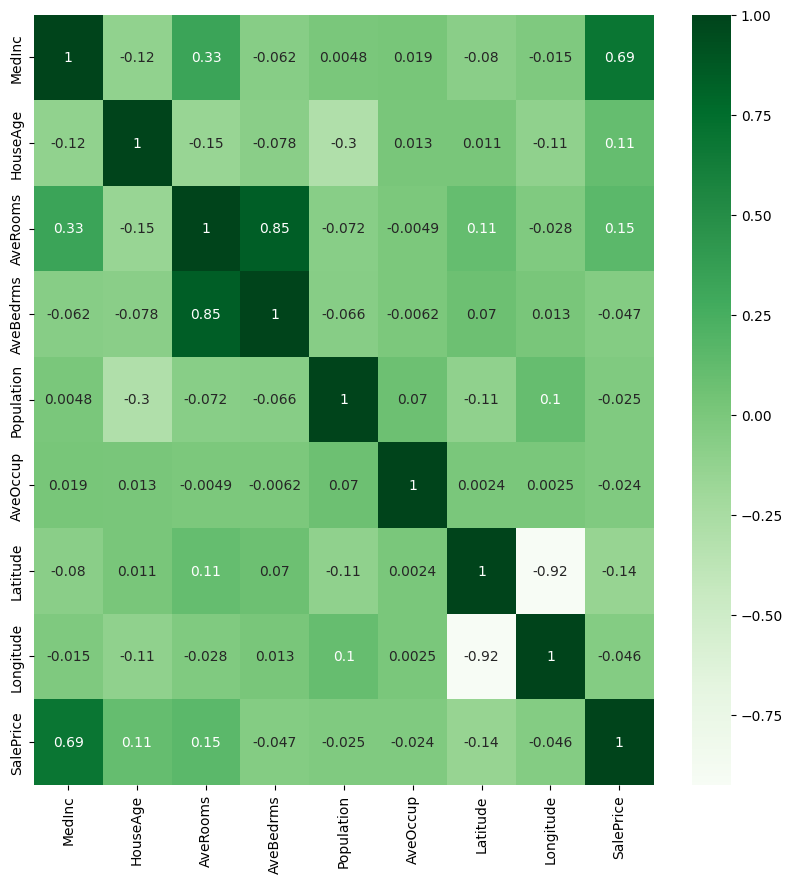

In [5]:
plt.figure(figsize=(10, 10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

/tmp/ipykernel_7969/1099305546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'] , fit=norm);



 mu = 1.06 and sigma = 0.36



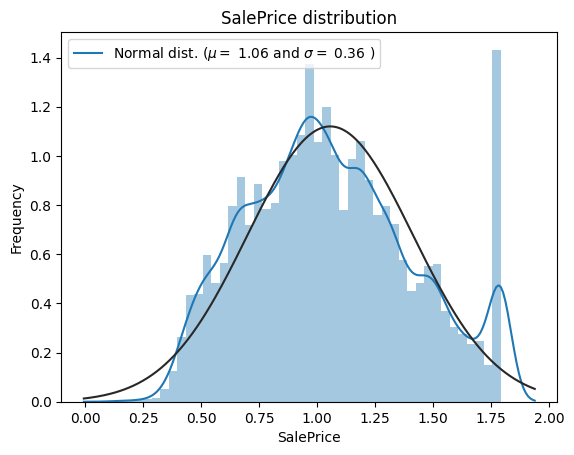

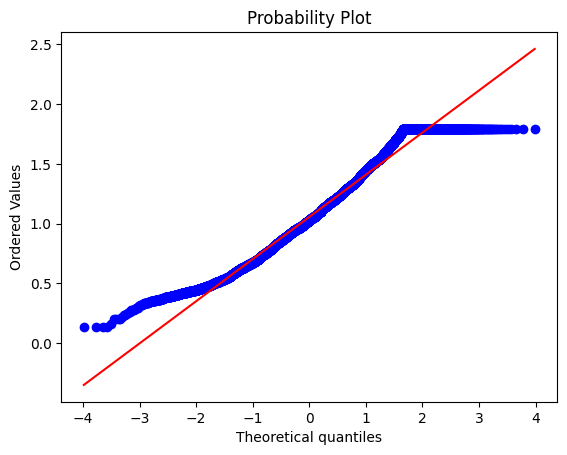

In [32]:
data["SalePrice"] = np.log1p(data["SalePrice"])

sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

In [33]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


Epoch 1/20
413/413 [==============================] - 2s 3ms/step - loss: 4.0895 - val_loss: 0.2466
Epoch 2/20
413/413 [==============================] - 1s 3ms/step - loss: 0.1504 - val_loss: 0.2992
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 0.1133 - val_loss: 0.0405
Epoch 4/20
413/413 [==============================] - 1s 3ms/step - loss: 0.0599 - val_loss: 0.0383
Epoch 5/20
413/413 [==============================] - 1s 3ms/step - loss: 0.0705 - val_loss: 0.0412
Epoch 6/20
413/413 [==============================] - 1s 3ms/step - loss: 0.0648 - val_loss: 0.0560
Epoch 7/20
413/413 [==============================] - 1s 2ms/step - loss: 0.0471 - val_loss: 0.0415
Epoch 8/20
413/413 [==============================] - 1s 3ms/step - loss: 0.0402 - val_loss: 0.0356
Epoch 9/20
413/413 [==============================] - 1s 3ms/step - loss: 0.0479 - val_loss: 0.0658
Epoch 10/20
413/413 [==============================] - 1s 3ms/step - loss: 0.0447 - val_loss: 0.0398

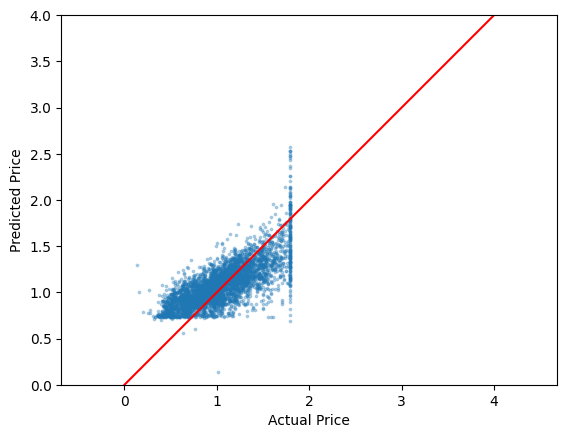

0.24354980342024854


In [37]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='huber_loss')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

mse = model.evaluate(X_test, y_test)
print(mse)

prediction = model.predict(X_test[:-1])
actual = y_test[:-1]

plt.axis('equal')
plt.xlim(0,4)
plt.ylim(0,4)
plt.scatter(actual, prediction, s=3, alpha = 0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([0, 4], [0, 4], 'r')
plt.show()

mse = mean_squared_error(actual, prediction) 
rmse = np.sqrt(mse)
print(rmse)

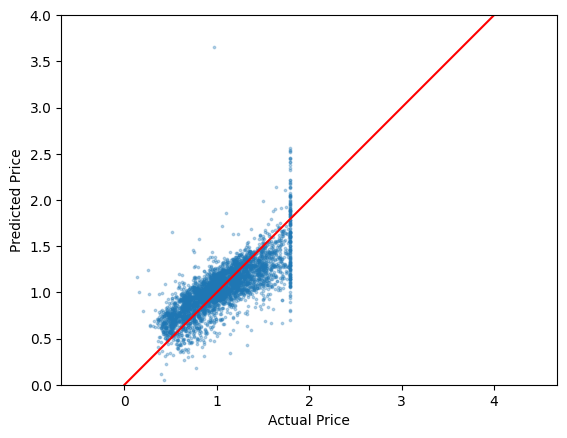

0.22436602177852213


In [35]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)  
actual = y_test
plt.axis('equal')
plt.xlim(0,4)
plt.ylim(0,4)
plt.scatter(actual, predictions, s=3, alpha = 0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([0, 4], [0, 4], 'r')
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
print(rmse)